<a href="https://colab.research.google.com/github/aaceelll/Implementasi-Regresi-Rachel-Savitri-21120122140111/blob/main/Implementasi_Regresi_Rachel_Savitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rachel Savitri - 21120122140111 - Kelas C

Implementasi Regresi

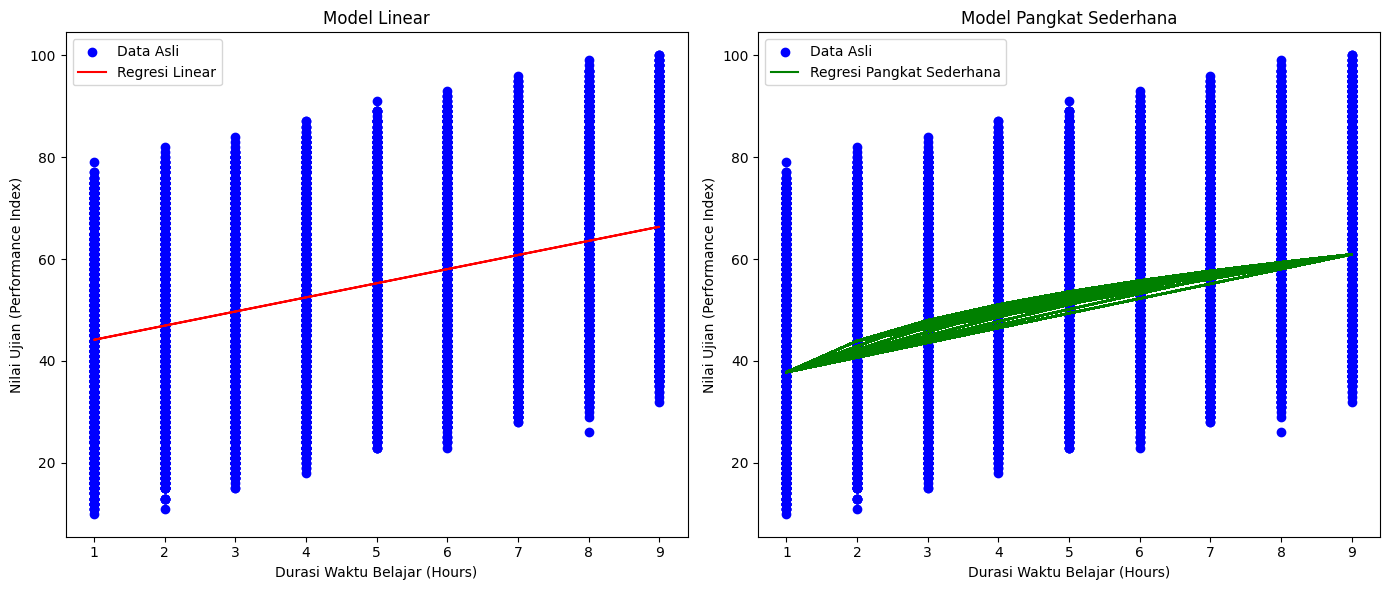

RMS Model Linear: 17.819474832547773
RMS Model Pangkat Sederhana: 18.175837301582977


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Membaca data dari file CSV
file_path = 'Student_Performance.csv'
df = pd.read_csv(file_path)

# Memisahkan kolom durasi waktu belajar dan nilai ujian
TB = df['Hours Studied'].values.reshape(-1, 1)
NT = df['Performance Index'].values.reshape(-1, 1)

#  Metode 1 dengan menggunakan Metode Linear
linear_model = LinearRegression()
linear_model.fit(TB, NT)
NT_pred_linear = linear_model.predict(TB)
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))

# Metode 2 dengan menggunakan Model Pangkat Sederhana
log_TB = np.log(TB)
log_NT = np.log(NT)
pangkat_model = LinearRegression()
pangkat_model.fit(log_TB, log_NT)
log_NT_pred_pangkat = pangkat_model.predict(log_TB)
NT_pred_pangkat = np.exp(log_NT_pred_pangkat)
rms_pangkat = np.sqrt(mean_squared_error(NT, NT_pred_pangkat))

# Visualisasi hasil
plt.figure(figsize=(14, 6))

# Plot Model Linear
plt.subplot(1, 2, 1)
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_linear, color='red', label='Regresi Linear')
plt.xlabel('Durasi Waktu Belajar (Hours)')
plt.ylabel('Nilai Ujian (Performance Index)')
plt.title('Model Linear')
plt.legend()

# Plot Model Pangkat Sederhana
plt.subplot(1, 2, 2)
plt.scatter(TB, NT, color='blue', label='Data Asli')
plt.plot(TB, NT_pred_pangkat, color='green', label='Regresi Pangkat Sederhana')
plt.xlabel('Durasi Waktu Belajar (Hours)')
plt.ylabel('Nilai Ujian (Performance Index)')
plt.title('Model Pangkat Sederhana')
plt.legend()

plt.tight_layout()
plt.show()

print(f'RMS Model Linear: {rms_linear}')
print(f'RMS Model Pangkat Sederhana: {rms_pangkat}')


# Bagian Baru